Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [8]:
y = data['diagnosis']
X = data.drop(['diagnosis'],axis=1)

In [9]:
y.unique()

array(['M', 'B'], dtype=object)

In [10]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='Count'>

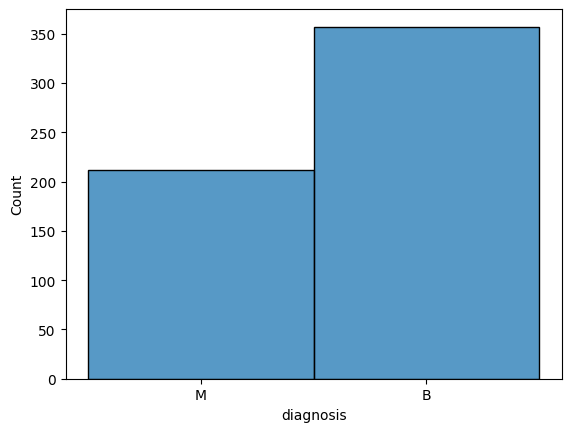

In [11]:
sns.histplot(y)

In [12]:
#map the diagnosis to 0 and 1
y = y.map({'M':1,'B':0})
y.value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

In [13]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


c:\Users\menna\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


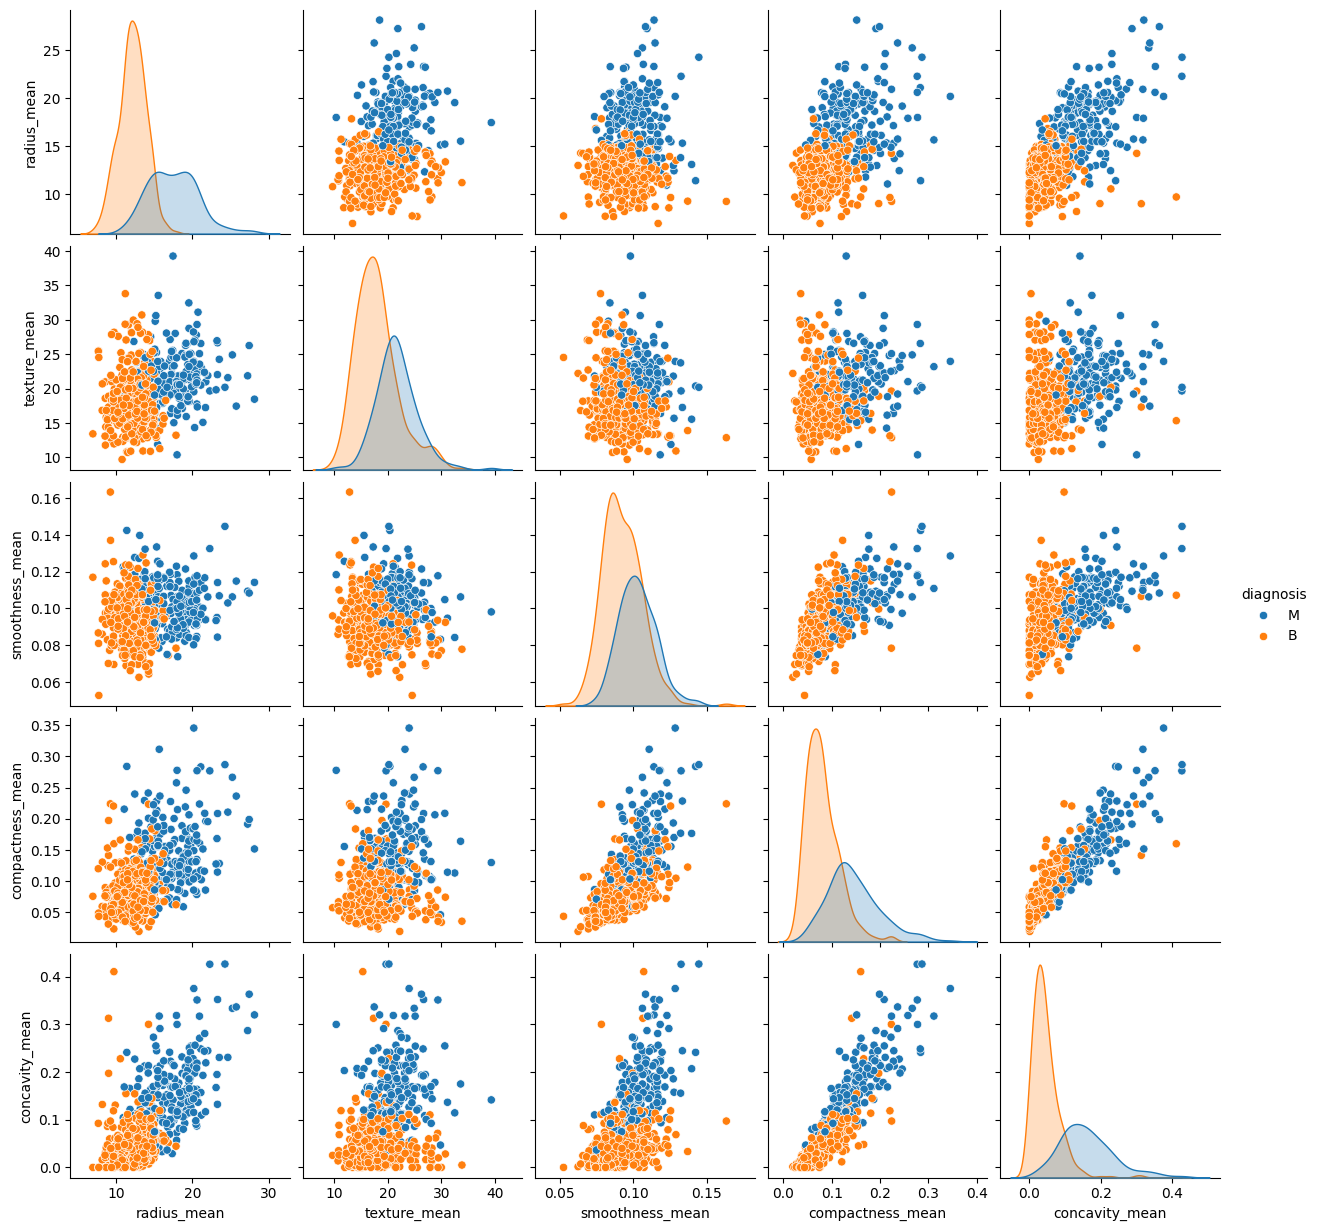

In [14]:
sns.pairplot(data,hue='diagnosis',vars=['radius_mean','texture_mean','smoothness_mean','compactness_mean','concavity_mean'])

<Axes: >

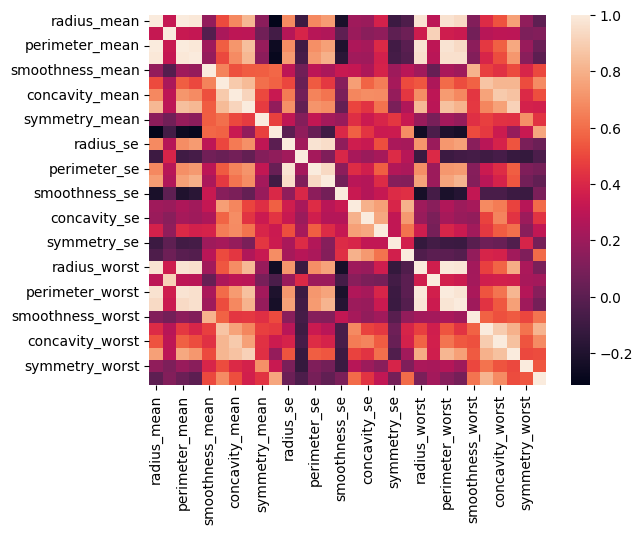

In [15]:
sns.heatmap(X.corr())

In [16]:
def high_corr(data,threshold):
    highly_corr = []
    for i in range(len(data.corr().columns)):
        for j in range(i):
            if abs(data.corr().iloc[i,j]) > threshold:
                print(f'({data.corr().columns[i]},{data.corr().columns[j]}) : {data.corr().iloc[i,j]}')
                highly_corr.append((data.corr().columns[i],data.corr().columns[j]))
    return highly_corr

high_corr_list = high_corr(X,0.95)


(perimeter_mean,radius_mean) : 0.9978552814938109
(area_mean,radius_mean) : 0.9873571700566127
(area_mean,perimeter_mean) : 0.9865068039913907
(perimeter_se,radius_se) : 0.9727936770160764
(area_se,radius_se) : 0.951830112110991
(radius_worst,radius_mean) : 0.9695389726112055
(radius_worst,perimeter_mean) : 0.9694763634663146
(radius_worst,area_mean) : 0.9627460860470841
(perimeter_worst,radius_mean) : 0.9651365139559871
(perimeter_worst,perimeter_mean) : 0.9703868870426394
(perimeter_worst,area_mean) : 0.9591195743552645
(perimeter_worst,radius_worst) : 0.993707916102949
(area_worst,area_mean) : 0.9592133256498998
(area_worst,radius_worst) : 0.9840145644590742
(area_worst,perimeter_worst) : 0.9775780914063871


In [17]:
high_corr_list

[('perimeter_mean', 'radius_mean'),
 ('area_mean', 'radius_mean'),
 ('area_mean', 'perimeter_mean'),
 ('perimeter_se', 'radius_se'),
 ('area_se', 'radius_se'),
 ('radius_worst', 'radius_mean'),
 ('radius_worst', 'perimeter_mean'),
 ('radius_worst', 'area_mean'),
 ('perimeter_worst', 'radius_mean'),
 ('perimeter_worst', 'perimeter_mean'),
 ('perimeter_worst', 'area_mean'),
 ('perimeter_worst', 'radius_worst'),
 ('area_worst', 'area_mean'),
 ('area_worst', 'radius_worst'),
 ('area_worst', 'perimeter_worst')]

In [18]:
X.drop(['perimeter_mean','area_mean','perimeter_se','area_se','perimeter_worst','area_worst'],axis=1,inplace=True)

In [19]:
X.shape

(569, 24)

[6.46981021e+02 1.18096059e+02 8.36511234e+01 3.13233079e+02
 5.33793126e+02 8.61676020e+02 6.95274435e+01 9.34592949e-02
 2.68840327e+02 3.90947023e-02 2.55796780e+00 5.32473391e+01
 3.90144816e+01 1.13262760e+02 2.41174067e-02 3.46827476e+00
 8.60781707e+02 1.49596905e+02 1.22472880e+02 3.04341063e+02
 4.36691939e+02 9.64385393e+02 1.18860232e+02 6.64439606e+01]


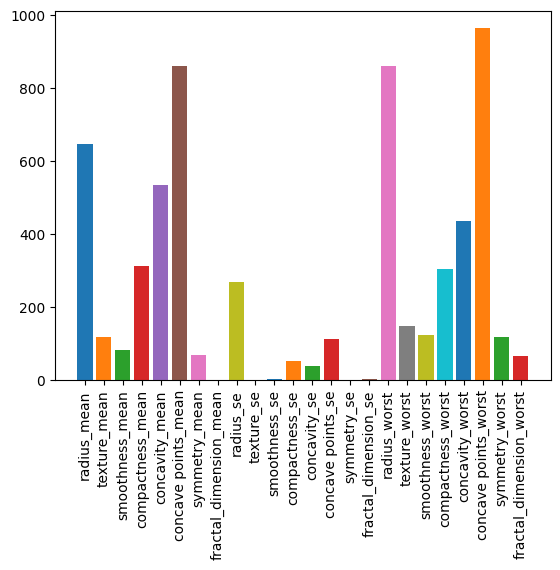

In [20]:
selector = SelectKBest(f_classif,k=X.shape[1])
selector.fit(X,y)
print(selector.scores_)
for i,score in enumerate(selector.scores_):
    plt.bar(i,score)
plt.xticks(range(X.shape[1]),X.columns,rotation=90)
plt.show()

In [21]:
X.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se',],axis=1,inplace=True)

In [22]:
X.shape

(569, 19)

In [23]:
X.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162,0.405172,0.025478,0.031894,0.011796,16.269190,25.677223,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414,0.277313,0.017908,0.030186,0.006170,4.833242,6.146258,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.111500,0.002252,0.000000,0.000000,7.930000,12.020000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.232400,0.013080,0.015090,0.007638,13.010000,21.080000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200,0.324200,0.020450,0.025890,0.010930,14.970000,25.410000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700,0.478900,0.032450,0.042050,0.014710,18.790000,29.720000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000,2.873000,0.135400,0.396000,0.052790,36.040000,49.540000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
X = StandardScaler().fit_transform(X)

In [25]:
X_,X_test,Y_,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_,Y_,test_size=0.3,random_state=42)
print(X_train.shape,X_val.shape,X_test.shape)

(318, 19) (137, 19) (114, 19)


In [26]:
model = LogisticRegression().fit(X_train,y_train)
y_pred = model.predict(X_val)
predection = model.predict(X_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

Val Accuracy: 0.9635036496350365
Test Accuracy: 0.956140350877193


              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



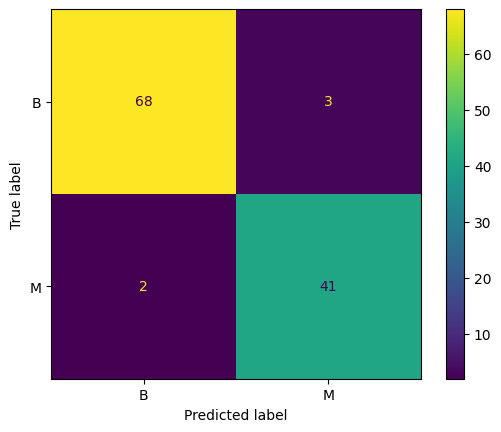

In [27]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()

In [28]:
def grid_search(model,params,X_train,y_train):
    grid = GridSearchCV(model,params,scoring='f1')
    grid.fit(X_train,y_train)
    return grid.best_params_

In [29]:
model = KNeighborsClassifier()
params = {'n_neighbors':range(1,10),'weights':['uniform','distance']}
best = grid_search(model,params,X_train,y_train)
best

{'n_neighbors': 1, 'weights': 'uniform'}

In [30]:
model = KNeighborsClassifier(n_neighbors=best['n_neighbors'],weights=best['weights']).fit(X_train,y_train)
y_pred = model.predict(X_val)
predection = model.predict(X_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

Val Accuracy: 0.9708029197080292
Test Accuracy: 0.9473684210526315


              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



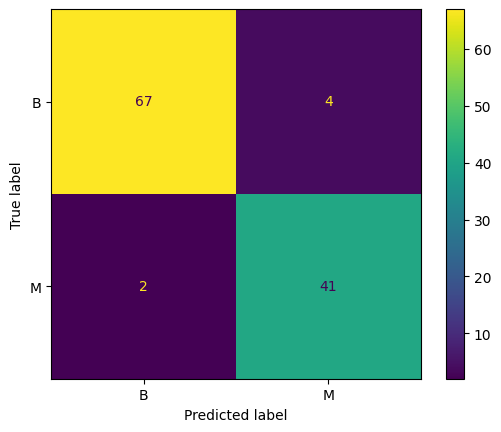

In [31]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()

In [32]:
model = RandomForestClassifier()
params = {'max_depth':[2,4,10,30,100], 'min_samples_split':[2,5,10,20,50], 'n_estimators':[10,50,100,200]}
best = grid_search(model,params,X_train,y_train)
best

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 10}

In [33]:
model = RandomForestClassifier(max_depth=best['max_depth'],min_samples_split=best['min_samples_split'],n_estimators=best['n_estimators']).fit(X_train,y_train)
y_pred = model.predict(X_val)
predection = model.predict(X_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

Val Accuracy: 0.9562043795620438
Test Accuracy: 0.956140350877193


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



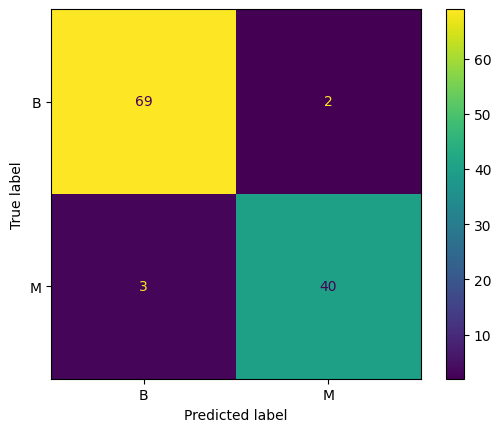

In [34]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()

In [35]:
model = XGBClassifier()
params = {'n_estimators':[10,50,100,200],'learning_rate':[0.01,0.1,0.3,0.5],'max_depth':[2,4,10,30,100]}
best = grid_search(model,params,X_train,y_train)
best

{'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 50}

In [36]:
model = XGBClassifier(n_estimators = best['n_estimators'], learning_rate = best['learning_rate'],max_depth=best['max_depth']).fit(X_train,y_train)
y_pred = model.predict(X_val)
predection = model.predict(X_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

Val Accuracy: 0.9562043795620438
Test Accuracy: 0.9649122807017544


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



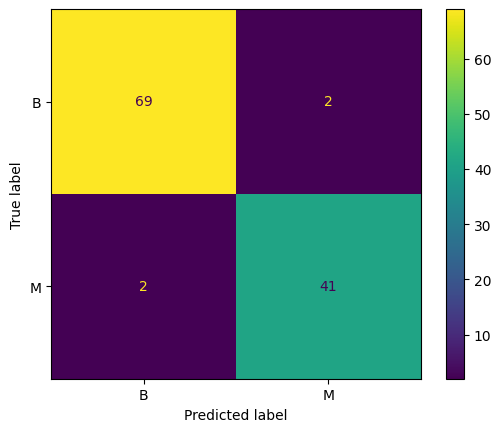

In [37]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()

In [38]:
model = LGBMClassifier()
params = {'n_estimators':[10,50,100],'learning_rate':[0.01,0.1,0.001],'max_depth':[2,4,10]}
best = grid_search(model,params,X_train,y_train)
best

[LightGBM] [Info] Number of positive: 96, number of negative: 158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 254, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377953 -> initscore=-0.498247
[LightGBM] [Info] Start training from score -0.498247
[LightGBM] [Info] Number of positive: 96, number of negative: 158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1602
[LightGBM] [Info] Number of data points in the train set: 254, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377953 -> initscore=-0.498247
[LightGBM] [Info] Start training from score -0.498247
[LightGBM] [Info] Number o

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [39]:
model = LGBMClassifier(n_estimators = best['n_estimators'], learning_rate = best['learning_rate'],max_depth=best['max_depth']).fit(X_train,y_train)
y_pred = model.predict(X_val)
predection = model.predict(X_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')

[LightGBM] [Info] Number of positive: 120, number of negative: 198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2016
[LightGBM] [Info] Number of data points in the train set: 318, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377358 -> initscore=-0.500775
[LightGBM] [Info] Start training from score -0.500775
Val Accuracy: 0.9562043795620438
Test Accuracy: 0.9649122807017544


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



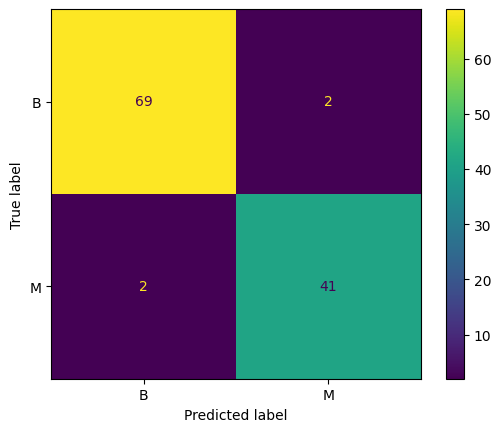

In [40]:
print(classification_report(y_test,predection))
cm = confusion_matrix(y_test,predection)
ConfusionMatrixDisplay(cm,display_labels=['B','M']).plot()